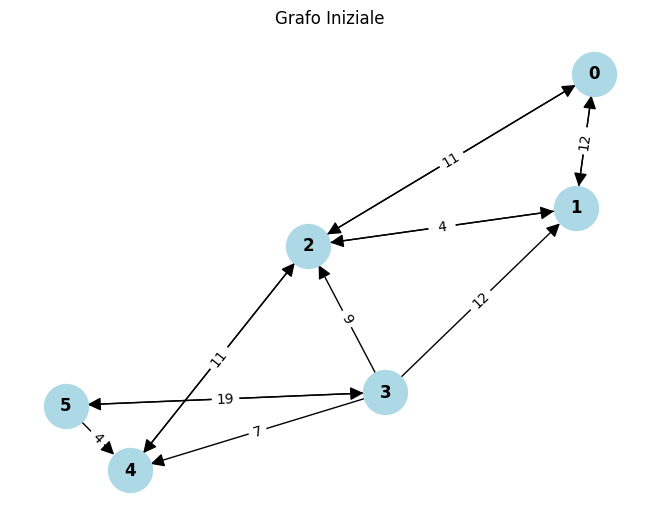

1 - 3
4 - 3
4 - 5


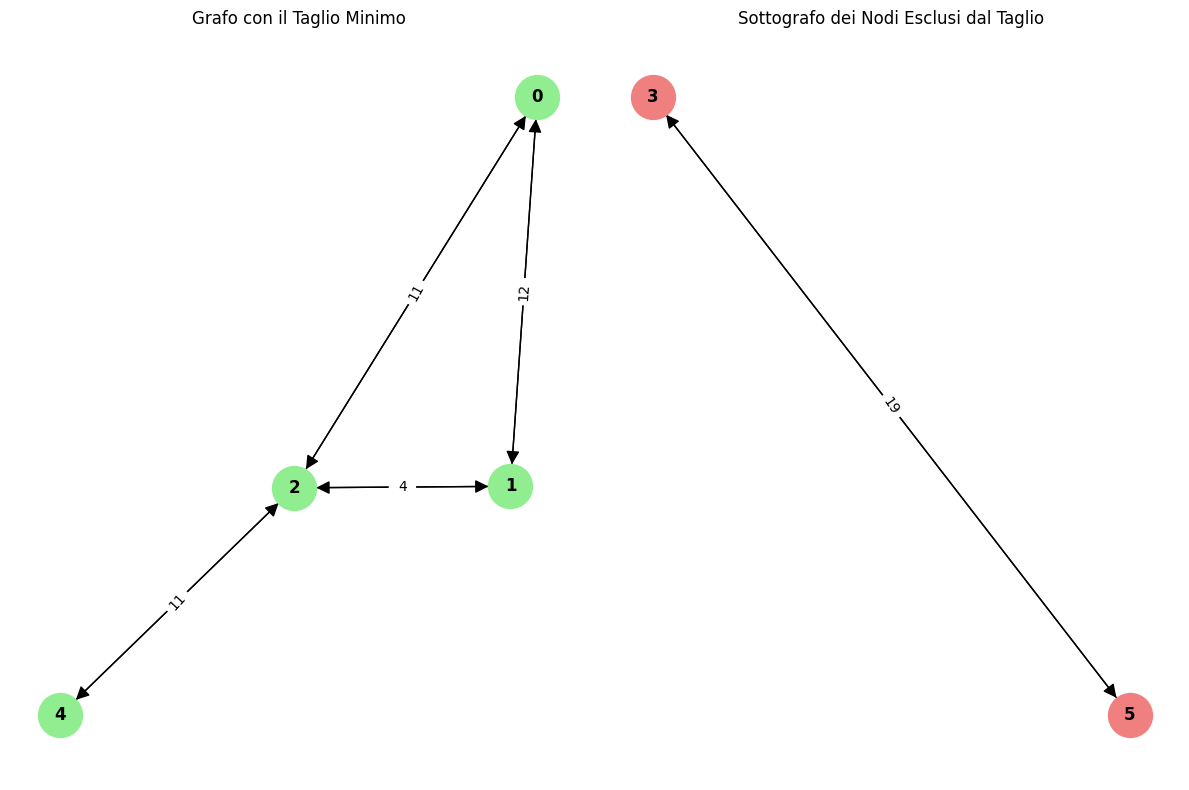

In [21]:
# Python program for finding min-cut in the given graph
# Complexity : (E*(V^3))
# Total augmenting path = VE and BFS
# with adj matrix takes :V^2 times

from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt


# This class represents a directed graph
# using adjacency matrix representation
class Graph:

	def __init__(self,graph):
		self.graph = graph # residual graph
		self.org_graph = [i[:] for i in graph]
		self. ROW = len(graph)
		self.COL = len(graph[0])


	'''Returns true if there is a path from
	source 's' to sink 't' in
	residual graph. Also fills
	parent[] to store the path '''
	def BFS(self,s, t, parent):

		# Mark all the vertices as not visited
		visited =[False]*(self.ROW)

		# Create a queue for BFS
		queue=[]

		# Mark the source node as visited and enqueue it
		queue.append(s)
		visited[s] = True

		# Standard BFS Loop
		while queue:

			#Dequeue a vertex from queue and print it
			u = queue.pop(0)

			# Get all adjacent vertices of
			# the dequeued vertex u
			# If a adjacent has not been
			# visited, then mark it
			# visited and enqueue it
			for ind, val in enumerate(self.graph[u]):
				if visited[ind] == False and val > 0 :
					queue.append(ind)
					visited[ind] = True
					parent[ind] = u

		# If we reached sink in BFS starting
		# from source, then return
		# true, else false
		return True if visited[t] else False
		
	# Function for Depth first search
	# Traversal of the graph
	def dfs(self, graph,s,visited):
		visited[s]=True
		for i in range(len(graph)):
			if graph[s][i]>0 and not visited[i]:
				self.dfs(graph,i,visited)


		
	# Returns the min-cut of the given graph
	def minCut(self, source, sink):

		# This array is filled by BFS and to store path
		parent = [-1]*(self.ROW)

		max_flow = 0 # There is no flow initially

		# Augment the flow while there is a path from source to sink
		while self.BFS(source, sink, parent) :

			# Find the minimum residual capacity of the edges along the
			# path filled by BFS. Or we can say find the maximum flow
			# through the path found.
			path_flow = float("Inf")
			s = sink
			while(s != source):
				path_flow = min (path_flow, self.graph[parent[s]][s])
				s = parent[s]

			# Add path flow to the overall flow
			max_flow += path_flow

			# Update residual capacities of the edges and reverse edges
			# along the path
			v = sink
			while(v != source):
				u = parent[v]
				self.graph[u][v] -= path_flow
				self.graph[v][u] += path_flow
				v = parent[v]

		# Mark visited nodes using Depth First Search (DFS)
		visited = [False] * self.ROW
		self.dfs(self.graph, source, visited)

		# Print the edges which initially had weights
		# but now have 0 weight
		for i in range(self.ROW):
			for j in range(self.COL):
				if self.graph[i][j] == 0 and self.org_graph[i][j] > 0 and visited[i]:
					print(str(i) + " - " + str(j))

		# Store the visited array as an attribute for later use
		self.visited = visited

def get_cut_nodes(graph, source, visited):
    cut_nodes = [node for node, is_visited in enumerate(visited) if is_visited]
    uncut_nodes = [node for node, is_visited in enumerate(visited) if not is_visited]
    return cut_nodes, uncut_nodes


""" def get_cut_nodes(graph, source, visited):
	cut_nodes = []
	uncut_nodes = []
	for node, is_visited in enumerate(visited):
		if is_visited:
			cut_nodes.append(node)
		else:
			uncut_nodes.append(node)
	return cut_nodes, uncut_nodes """

# Creazione del grafo iniziale
graph = [[0, 16, 13, 0, 0, 0],
         [0, 0, 10, 12, 0, 0],
         [0, 4, 0, 0, 14, 0],
         [0, 0, 9, 0, 0, 20],
         [0, 0, 0, 7, 0, 4],
         [0, 0, 0, 0, 0, 0]]

# Visualizzazione del grafo iniziale
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Grafo Iniziale")
plt.show()

# Risoluzione del min-cut
g = Graph(graph)
source = 0
sink = 5
g.minCut(source, sink)

# Ottieni i nodi inclusi nel taglio minimo e quelli esclusi
cut_nodes, uncut_nodes = get_cut_nodes(g.graph, source, g.visited)



# Creazione del grafo finale con il taglio minimo e dei sottografi
G = nx.DiGraph()
for i in range(len(graph)):
    for j in range(len(graph[i])):
        if graph[i][j] != 0:
            G.add_edge(i, j, weight=graph[i][j])

cut_graph = G.subgraph(cut_nodes)
uncut_graph = G.subgraph(uncut_nodes)

# Visualizzazione del grafo finale con il taglio minimo e dei sottografi
plt.figure(figsize=(12, 8))

# Disegno del grafo finale con il taglio minimo
plt.subplot(1, 2, 1)
cut_pos = nx.spring_layout(cut_graph, seed=42)
nx.draw(cut_graph, cut_pos, with_labels=True, node_size=1000, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=20)
cut_edge_labels = nx.get_edge_attributes(cut_graph, 'weight')
nx.draw_networkx_edge_labels(cut_graph, cut_pos, edge_labels=cut_edge_labels, font_size=10)
plt.title("Grafo con il Taglio Minimo")

# Disegno del sottografo dei nodi esclusi dal taglio
plt.subplot(1, 2, 2)
uncut_pos = nx.spring_layout(uncut_graph, seed=42)
nx.draw(uncut_graph, uncut_pos, with_labels=True, node_size=1000, node_color='lightcoral', font_size=12, font_weight='bold', arrowsize=20)
uncut_edge_labels = nx.get_edge_attributes(uncut_graph, 'weight')
nx.draw_networkx_edge_labels(uncut_graph, uncut_pos, edge_labels=uncut_edge_labels, font_size=10)
plt.title("Sottografo dei Nodi Esclusi dal Taglio")

# Visualizzazione dei sottografi
plt.tight_layout()
plt.show()

